In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utils.segmentation import *
import matplotlib.pyplot as plt

In [15]:
predictor, cfg = init_config('./models/model_final.pth', SCORE_THRESH_TEST = 0.5)

(-0.5, 3999.5, 2999.5, -0.5)

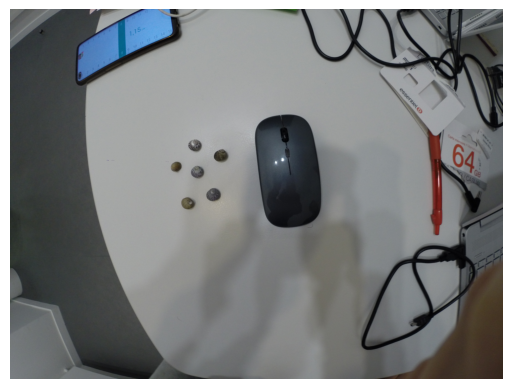

In [18]:
img = cv2.imread('./data/imgs_c0/GOPR1546.JPG')
plt.imshow(img[:, :, ::-1]); plt.axis(False)

In [27]:
# Inferred with the images of each camera
output_cam1, _ = inference(predictor, cfg,  img)

In [30]:
scores = output_cam1["instances"].scores
classes1 = output_cam1["instances"].pred_classes
masks_cam1 = output_cam1["instances"].pred_masks.cpu().numpy().astype(np.uint8)

In [31]:
# voir les classes predites
## le resultat est de la forme : tensor([0, 1, 1, 2, 3, 3]), cela veut dire :
## une espces PFE, deux actinia fermées, une ouverte et deux gibbula
scores, classes1

(tensor([0.9913, 0.9831, 0.9671, 0.9634, 0.9451, 0.8928, 0.5974, 0.5574],
        device='cuda:0'),
 tensor([3, 3, 3, 3, 3, 3, 3, 3], device='cuda:0'))

In [ ]:
classes1 = classes1.cpu().numpy()
classes2 = classes1.cpu().numpy()

In [ ]:
def detections_ok(classes1, classes2):
    classes1 = classes1.cpu().numpy()
    classes2 = classes2.cpu().numpy()
    if ( not len(classes1) or not len(classes2)                    ) or \
       ( not np.array_equal(np.sort(classes1), np.sort(classes2))  ):
        return False
    return True